In [1]:
%pylab inline
from scipy.fftpack import ifft, fft, fftfreq

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.genfromtxt('monthrg.dat')#, delimiter = '\t')

init_year = 1610

years = data[:, 0]
months = data[:, 1]/12 + years
means = data[:, 3]
devs = data[:, 4]

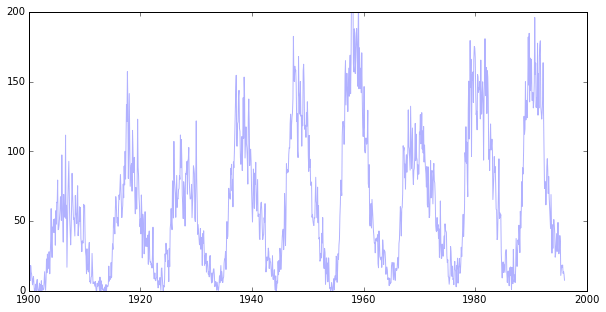

In [3]:
fig = plt.figure('Manchas', figsize = (10, 5))
ax = fig.add_subplot(111)

ax.set_xlim([1900, 2000])
ax.set_ylim([0, 200])
ax.plot(months, means, alpha = 0.3)



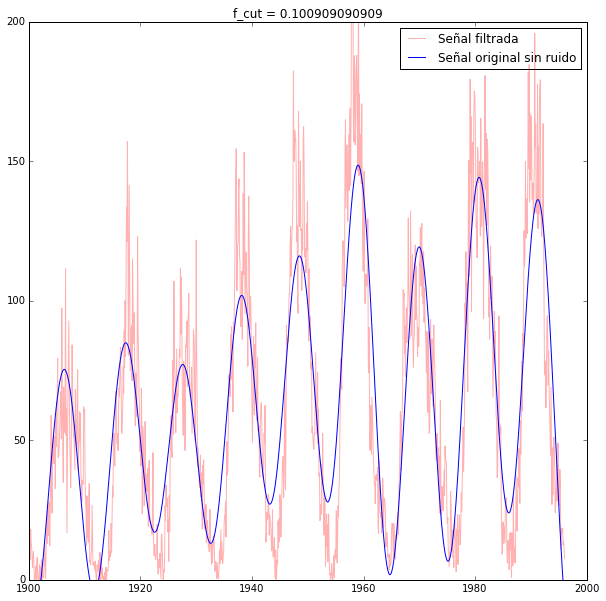

In [87]:
fig2 = plt.figure('redu', figsize=(10, 10))

fourier = fft(means)
fourie = fourier
freqs = fftfreq(len(means), 1./12)

freq_cuts= np.logspace(np.log10(1./11 + 0.01), np.log10(1./11 + 0.01), 1)#np.logspace(log10(0.001), np.log10(0.5), 10)#

for k in range(1,2):
    freq_max = freq_cuts[-k]
    fourie[np.abs(freqs) > freq_max] = 0
    
    y_cleaned=ifft(fourie)
    plt.subplot(1,1,k)
    plt.xlim([1900, 2000])
    plt.ylim([0, 200])
    plt.plot(months, means, 'r-', alpha = 0.3, label=u'Señal filtrada')
    plt.plot(months, y_cleaned, 'b-', label=u'Señal original sin ruido')
    plt.legend( )
    plt.title("f_cut = "+ str(freq_max))    
    